In [46]:
import pandas as pd
import csv

from pandas import DataFrame
import pickle

import matplotlib.pyplot as plt
import numpy as np
import os
import math


In [47]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [48]:
sequence1 = [0,1,2,1,3,4,3,2,1,0]
sequence2 = [1,4,0,0,1,2,2,4,3,0]

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

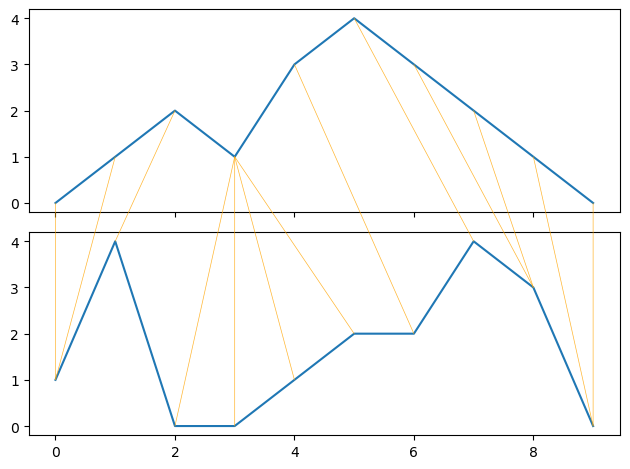

In [49]:
path = dtw.warping_path(sequence1, sequence2)
dtwvis.plot_warping(sequence1, sequence2, path, filename="warp.png")
dtwvis.plot_warping(sequence1, sequence2, path)

In [50]:
distance = dtw.distance(sequence1, sequence2)
print(distance)

3.3166247903554


In [51]:
distance, paths = dtw.warping_paths(sequence1, sequence2)
print("Distance =", distance)
best_path = dtw.best_path(paths)
print("best path =",best_path)
#np.set_printoptions(precision=3)
print(paths)

Distance = 3.3166247903554
best path = [(0, 0), (1, 0), (2, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 8), (8, 9), (9, 9)]
[[0.      inf   inf   inf   inf   inf   inf   inf   inf   inf   inf]
 [  inf 1.    4.123 4.123 4.123 4.243 4.69  5.099 6.481 7.141 7.141]
 [  inf 1.    3.162 3.317 3.464 3.464 3.606 3.742 4.796 5.196 5.292]
 [  inf 1.414 2.236 3.    3.606 3.606 3.464 3.464 4.    4.123 4.583]
 [  inf 1.414 3.317 2.449 2.646 2.646 2.828 3.    4.243 4.472 4.243]
 [  inf 2.449 1.732 3.464 3.873 3.317 2.828 3.    3.162 3.162 4.359]
 [  inf 3.873 1.732 4.359 5.292 4.472 3.464 3.464 3.    3.162 5.099]
 [  inf 4.359 2.    3.464 4.583 4.899 3.606 3.606 3.162 3.    4.243]
 [  inf 4.472 2.828 2.828 3.464 3.606 3.606 3.606 3.742 3.162 3.606]
 [  inf 4.472 4.123 3.    3.    3.    3.162 3.317 4.472 3.742 3.317]
 [  inf 4.583 5.745 3.    3.    3.162 3.606 3.742 5.196 4.796 3.317]]


(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

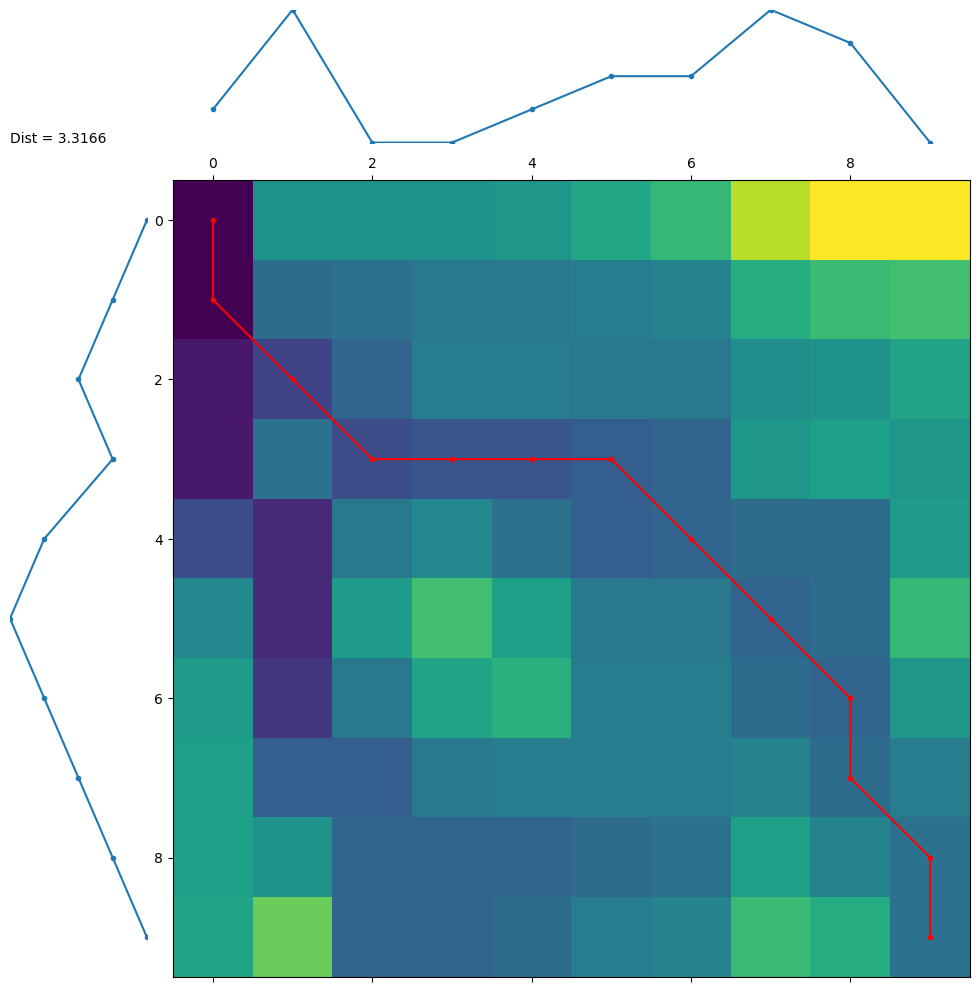

In [52]:
sequence1 = np.array(sequence1)
sequence2 = np.array(sequence2)
dtwvis.plot_warpingpaths(sequence1, sequence2, paths, best_path)

In [53]:
filenames = {
    "cruz_ej": {
        "1" : [
            "cruz_ej1_0.pos",
            "cruz_ej1_3.pos",
            "cruz_ej1_4.pos",
            "cruz_ej1_8.pos",
            "cruz_ej1_12.pos",
            "cruz_ej1_13.pos",
            "cruz_ej1_15.pos",
            "cruz_ej1_21.pos",
            "cruz_ej1_24.pos",
            "cruz_ej1_27.pos",
            "cruz_ej1_35.pos",
            "cruz_ej1_40.pos",
            "cruz_ej1_44.pos",
            "cruz_ej1_48.pos",
            "cruz_ej1_52.pos",
            "cruz_ej1_55.pos",
            "cruz_ej1_57.pos",
            ],
        "2" : [
            "cruz_ej2_1.pos",
            "cruz_ej2_9.pos",
            "cruz_ej2_5.pos",
            "cruz_ej2_14.pos",
            "cruz_ej2_19.pos",
            "cruz_ej2_22.pos",
            "cruz_ej2_23.pos",
            "cruz_ej2_25.pos",
            "cruz_ej2_26.pos",
            "cruz_ej2_28.pos",
            "cruz_ej2_29.pos",
            "cruz_ej2_36.pos",
            "cruz_ej2_37.pos",
            "cruz_ej2_41.pos",
            "cruz_ej2_45.pos",
            "cruz_ej2_47.pos",
            "cruz_ej2_49.pos",
            "cruz_ej2_53.pos",
            "cruz_ej2_60.pos",
        ],
        "3" : [
            "cruz_ej3_2.pos",
            "cruz_ej3_6.pos",
            "cruz_ej3_7.pos",
            "cruz_ej3_10.pos",
            "cruz_ej3_11.pos",
            "cruz_ej3_16.pos",
            "cruz_ej3_17.pos",
            "cruz_ej3_18.pos",
            "cruz_ej3_20.pos",
            "cruz_ej3_43.pos",
            "cruz_ej3_59.pos",
        ],
        "4" : [
            "cruz_ej4_30.pos",
            "cruz_ej4_31.pos",
            "cruz_ej4_32.pos",
            "cruz_ej4_33.pos",
            "cruz_ej4_34.pos",
            "cruz_ej4_38.pos",
            "cruz_ej4_39.pos",
            "cruz_ej4_42.pos",
            "cruz_ej4_46.pos",
            "cruz_ej4_50.pos",
            "cruz_ej4_51.pos",
            "cruz_ej4_54.pos",
            "cruz_ej4_56.pos",
            "cruz_ej4_58.pos",
        ]
    },
    "pelota" : {
        "1" : [
            "pelota1_4.pos",
            "pelota1_7.pos",
            "pelota1_0.pos",
            "pelota1_1.pos",
            "pelota1_11.pos",
            "pelota1_14.pos",
            "pelota1_17.pos",
            "pelota1_20.pos",
            "pelota1_23.pos",
            "pelota1_24.pos",
            "pelota1_28.pos",
            "pelota1_30.pos",
            "pelota1_31.pos",
        ],
        "2": [
            "pelota2_2.pos",
            "pelota2_5.pos",
            "pelota2_8.pos",
            "pelota2_12.pos",
            "pelota2_15.pos",
            "pelota2_18.pos",
            "pelota2_21.pos",
            "pelota2_29.pos",
            "pelota2_32.pos",
        ]
    }
}

In [54]:
'''
Datos
'''
data_path = "../datos/"
path_df = data_path + "DataFrames"
path_csv = data_path + "CSV"

dataframes = []
csvs = []
for i in filenames["pelota"]["1"]:
    actual_df = path_df + os.sep + i + ".df"
    actual_csv = path_csv + os.sep + i + ".csv"
    dataframes.append(actual_df)
    csvs.append(actual_csv)

In [55]:
def open_csv(csv_name):
    mycsv = pd.read_csv(csv_name)
    return mycsv

def open_dataframe(df_name):
    with open(df_name, 'rb') as fp:
            df = pd.read_pickle(fp)
    return df


In [56]:
body = ['nariz', 'cuello', 'hombroI', 'hombroD',
       'codoI', 'codoD', 'manoI', 'manoD', 'caderaI', 'caderaD',
       'caderaM', 'rodillaI', 'rodillaD', 'tobilloI', 'tobilloD']

In [57]:
csv_name_1 = csvs[0]
my_csv1 = open_csv(csv_name_1)

csv_name_2 = csvs[1]
my_csv2 = open_csv(csv_name_2)
#my_csv2 = my_csv1.copy()

In [58]:
def get_position(df, body_part):
    x = df.loc[:, body_part + "_x"]
    y = df.loc[:, body_part + "_y"] 
    return x, y

def set_position(df, body_part, positions):
    df.loc[:, body_part + "_x"] = positions[0]
    df.loc[:, body_part + "_y"] = positions[1] 

def get_positions_from_df(df):
    positions = []
    positionsx = []
    positionsy = []
    for part in body:
        x, y = get_position(df, part)
        positionsx.append(x) 
        positionsy.append(y)
    
    positions.append(positionsx)
    positions.append(positionsy)
    positions = np.array(positions).reshape(2, len(body))
    return positions

def set_positions_from_df(df, positions):
    x, y = positions
    for i in range(len(x)):
        set_position(df, body[i], (x[i], y[i]))
    return df

def plot_point(positions, show: bool = True):
    x, y = positions
    plt.scatter(x,y, marker='o')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Pose')

    if show:
        plt.show()

Normalizados
1 =  [0.396 0.115 0.396 0.115 0.394 0.107 0.388 0.104 0.388 0.104 0.399 0.11 ]
 =  [0.389 0.114 0.389 0.114 0.389 0.114 0.388 0.105 0.4   0.118 0.398 0.118]
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11)]


0.02464340243807009

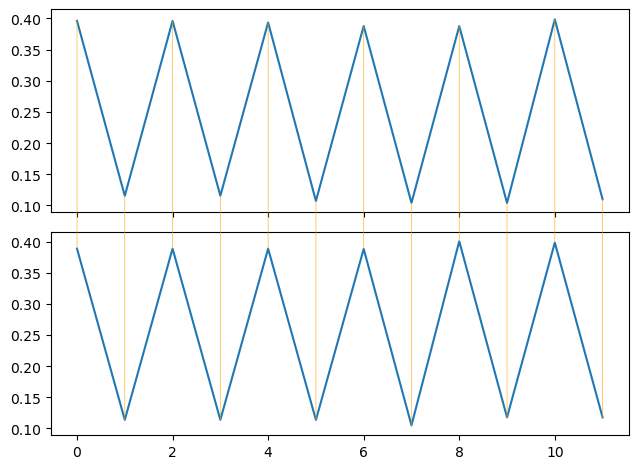

In [59]:
part= "cuello"
positions1 = get_position(my_csv1, part)
positions2 = get_position(my_csv2, part)

positions1 = np.array(positions1).transpose()
positions2 = np.array(positions2).transpose()

positions1 = positions1[[0, 10, 100, 300, 301, 400],:]
positions2 = positions2[[0, 1, 10, 30, 401, 405],:]

positions1 = positions1/np.linalg.norm(positions1)
positions2 = positions2/np.linalg.norm(positions2)

positions1 = positions1.reshape(2*len(positions1),)
positions1 = positions1/np.linalg.norm(positions1)

positions2 = positions2.reshape(2*len(positions2),)
positions2 = positions2/np.linalg.norm(positions2)

print("Normalizados")
print("1 = ", positions1)
print(" = ", positions2)

path = dtw.warping_path(positions1, positions2)
np.set_printoptions(precision=3)
print(path)
dtwvis.plot_warping(positions1, positions2, path)
dtw.distance(positions1, positions2)

In [60]:
def normalize(positions):
    #print(np.linalg.norm(positions))
    normalized = positions/np.linalg.norm(positions)
    return normalized

def dtwdis(positions1, positions2,i,j):
    positions1 = positions1.reshape(2*i,)
    positions1 = normalize(positions1)
    
    positions2 = positions2.reshape(2*j,)
    positions2 = normalize(positions2)
    
    return dtw.distance(positions1, positions2)

def distance_dtw(points1, points2):
    scores = []
    for part in body:
        positions1 = np.array(get_position(points1, part)).transpose()
        positions2 = np.array(get_position(points2, part)).transpose()
        positions1 = normalize(positions1)
        positions2 = normalize(positions2)
        scores.append(dtwdis(positions1, positions2, len(positions1), len(positions2)))
    return 1 - np.mean(scores)


In [61]:
print(distance_dtw(my_csv1, my_csv2))

0.5515989938590115
